In [3]:
import pandas as pd
import os
import numpy as np
# import dask.dataframe as dd
# from dask.diagnostics import ProgressBar
import geopandas as gpd
import datetime
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.font_manager import FontProperties
fp = FontProperties(
    fname=r'./WeiBo Warm Colour Tone Love Handwriting Chinese Font -Simplified Chinese Fonts.ttf'
    , size=6
)
import psutil
%matplotlib inline



In [4]:
shp = gpd.read_file('./taipei_subway_shapefiles/stations/TpeMRTStations_TWD97.shp', crs={'init': 'TWD97'})



In [5]:
shp.head()


,AREA,PERIMETER,NAME,LOC,geometry
0,0.0,0.0,淡水站,原有台鐵淡水站附近,POINT (294883.35815734 2784459.182455607)
1,0.0,0.0,紅樹林站,現有外北勢溪附近,POINT (296269.2306355351 2782926.473443732)
2,0.0,0.0,竹圍站,原有台鐵竹圍站附近,POINT (296326.3128539388 2781025.329013702)
3,0.0,0.0,關渡站,關渡國小附近近靠原台鐵淡水線,POINT (297111.3492362947 2779791.382373258)
4,0.0,0.0,忠義站,中央北路四段 (捷運系統北投機廠西側),POINT (297706.6419310117 2780343.547077411)


In [121]:
name_dict = dict(list(zip(shp.NAME, re.station_id)))


#### Real Estate

In [6]:
fp = './subway_estate/sub_estate.shp'
re = gpd.read_file(
    fp
)
re.head()

,FID_1,NAME,BUFF_DIST,station_id,Count_,Sum_market,Avg_market,Min_market,Max_market,SD_market_,...,Avg_mark_1,Min_mark_1,Max_mark_1,SD_marke_1,Sum_mark_2,Avg_mark_2,Min_mark_2,Max_mark_2,SD_marke_2,geometry
0,0,淡水,0.6,60,0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,"POLYGON ((121.445258308 25.17340964600004, 121..."
1,1,紅樹林,0.6,59,0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,"POLYGON ((121.4589545120001 25.15953053100003,..."
2,2,竹圍,0.6,58,0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,"POLYGON ((121.459456452 25.14236541900004, 121..."
3,3,關渡,0.6,57,2002,195998341.0,97901.269231,3800.0,201000.0,45656.692977,...,91278.821179,3800.0,200000.0,43309.725221,181651444.0,90734.987013,3800.0,200000.0,43162.177103,"POLYGON ((121.4671997250001 25.13120110700004,..."
4,4,忠義,0.6,56,1441,105085023.0,72925.068008,3800.0,174000.0,46243.899287,...,65600.738376,3800.0,200000.0,42176.561849,93463343.0,64860.057599,3800.0,200000.0,41444.413081,"POLYGON ((121.4731222410001 25.13616727600004,..."


In [122]:
name_dict = dict(list(zip(re.NAME, re.station_id)))


#### Demographic

In [8]:
fp = './demo/subway_ageGender6.shp'
demo = gpd.read_file(
    fp
)
demo.drop(labels=['age_gender', 'geometry'], axis=1, inplace=True)
demo.head()

,Join_Count,TARGET_FID,JOIN_FID,NAME,BUFF_DIST,station_id,AREA,TNAME,LIE_NAME,pop_area,...,y18_8084_s,y18_8589_F,y18_8589_M,y18_8589_s,y18_9094_F,y18_9094_M,y18_9094_s,y18_9599_F,y18_9599_M,y18_9599_s
0,0,0,-1,淡水,0.6,60.0,0.000000e+00,None,None,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,-1,紅樹林,0.6,59.0,0.000000e+00,None,None,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,2,-1,竹圍,0.6,58.0,0.000000e+00,None,None,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,3,20,關渡,0.6,57.0,2.711621e+06,北投區,一德里,0.002891,...,127.0,41.0,35.0,76.0,21.0,13.0,34.0,3.0,3.0,6.0
4,1,3,36,關渡,0.6,57.0,1.639820e+06,北投區,關渡里,0.007258,...,249.0,78.0,88.0,166.0,33.0,36.0,69.0,6.0,17.0,23.0


In [9]:
demo_dta_grp = demo.groupby(['NAME']).agg({
    'station_id':'max'
    , 'pop_area': 'mean', 'y17_total_': 'mean', 'y17_04_F': 'mean', 'y17_04_M': 'mean', 'y17_04_sum': 'mean', 'y17_1014_F': 'mean', 'y17_1014_M': 'mean', 'y17_1014_s': 'mean', 'y17_1519_F': 'mean', 'y17_1519_M': 'mean', 'y17_1519_s': 'mean', 'y17_2024_F': 'mean', 'y17_2024_M': 'mean', 'y17_2024_s': 'mean', 'y17_2529_F': 'mean', 'y17_2529_M': 'mean', 'y17_2529_s': 'mean', 'y17_3034_F': 'mean', 'y17_3034_M': 'mean', 'y17_3034_s': 'mean', 'y17_3539_F': 'mean', 'y17_3539_M': 'mean', 'y17_3539_s': 'mean', 'y17_4044_F': 'mean', 'y17_4044_M': 'mean', 'y17_4044_s': 'mean', 'y17_4549_F': 'mean', 'y17_4549_M': 'mean', 'y17_4549_s': 'mean', 'y17_5054_F': 'mean', 'y17_5054_M': 'mean', 'y17_5054_s': 'mean', 'y17_5559_F': 'mean', 'y17_5559_M': 'mean', 'y17_5559_s': 'mean', 'y17_59_F': 'mean', 'y17_59_M': 'mean', 'y17_59_sum': 'mean', 'y17_6064_F': 'mean', 'y17_6064_M': 'mean', 'y17_6064_s': 'mean', 'y17_6569_F': 'mean', 'y17_6569_M': 'mean', 'y17_6569_s': 'mean', 'y17_7074_F': 'mean', 'y17_7074_M': 'mean', 'y17_7074_s': 'mean', 'y17_7579_F': 'mean', 'y17_7579_M': 'mean', 'y17_7579_s': 'mean', 'y17_8084_F': 'mean', 'y17_8084_M': 'mean', 'y17_8084_s': 'mean', 'y17_8589_F': 'mean', 'y17_8589_M': 'mean', 'y17_8589_s': 'mean', 'y17_9094_F': 'mean', 'y17_9094_M': 'mean', 'y17_9094_s': 'mean', 'y17_9599_F': 'mean', 'y17_9599_M': 'mean', 'y17_9599_s': 'mean', 'y18_total_': 'mean', 'y18_total1': 'mean', 'y18_tota_1': 'mean', 'y18_04_F': 'mean', 'y18_04_M': 'mean', 'y18_04_sum': 'mean', 'y18_1014_F': 'mean', 'y18_1014_M': 'mean', 'y18_1014_s': 'mean', 'y18_1519_F': 'mean', 'y18_1519_M': 'mean', 'y18_1519_s': 'mean', 'y18_2024_F': 'mean', 'y18_2024_M': 'mean', 'y18_2024_s': 'mean', 'y18_2529_F': 'mean', 'y18_2529_M': 'mean', 'y18_2529_s': 'mean', 'y18_3034_F': 'mean', 'y18_3034_M': 'mean', 'y18_3034_s': 'mean', 'y18_3539_F': 'mean', 'y18_3539_M': 'mean', 'y18_3539_s': 'mean', 'y18_4044_F': 'mean', 'y18_4044_M': 'mean', 'y18_4044_s': 'mean', 'y18_4549_F': 'mean', 'y18_4549_M': 'mean', 'y18_4549_s': 'mean', 'y18_5054_F': 'mean', 'y18_5054_M': 'mean', 'y18_5054_s': 'mean', 'y18_5559_F': 'mean', 'y18_5559_M': 'mean', 'y18_5559_s': 'mean', 'y18_59_F': 'mean', 'y18_59_M': 'mean', 'y18_59_sum': 'mean', 'y18_6064_F': 'mean', 'y18_6064_M': 'mean', 'y18_6064_s': 'mean', 'y18_6569_F': 'mean', 'y18_6569_M': 'mean', 'y18_6569_s': 'mean', 'y18_7074_F': 'mean', 'y18_7074_M': 'mean', 'y18_7074_s': 'mean', 'y18_7579_F': 'mean', 'y18_7579_M': 'mean', 'y18_7579_s': 'mean', 'y18_8084_F': 'mean', 'y18_8084_M': 'mean', 'y18_8084_s': 'mean', 'y18_8589_F': 'mean', 'y18_8589_M': 'mean', 'y18_8589_s': 'mean', 'y18_9094_F': 'mean', 'y18_9094_M': 'mean', 'y18_9094_s': 'mean', 'y18_9599_F': 'mean', 'y18_9599_M': 'mean', 'y18_9599_s': 'mean'
})

del_i = np.where(demo_dta_grp['y18_8084_s'] < 1e-5)[0].tolist()
kp_i = np.where(demo_dta_grp['y18_8084_s'] > 1e-5)[0].tolist()
kp_nms = demo.index[kp_i]

demo_dta = np.array(demo_dta_grp)

In [10]:
demo_dta_tp = np.delete(
    demo_dta
    , del_i
    , axis=0
)

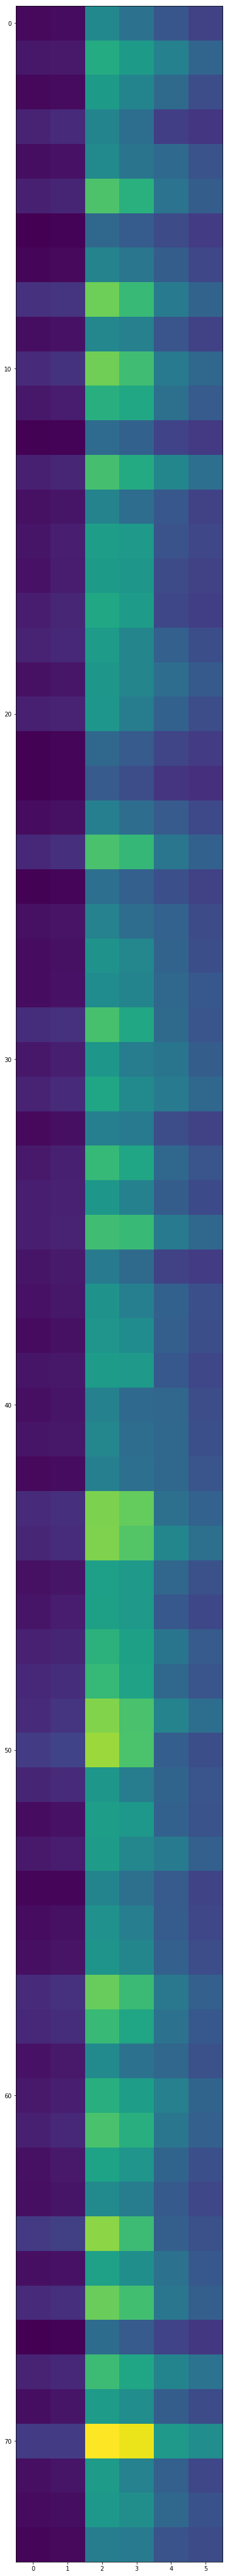

In [12]:
young_pop_F = demo_dta_grp[
    ['y17_04_F', 'y17_1014_F', 'y17_1519_F', 'y18_04_F', 'y18_1014_F', 'y18_1519_F']
].sum(axis=1)

young_pop_M = demo_dta_grp[
    ['y17_04_M', 'y17_1014_M', 'y17_1519_M', 'y18_04_M', 'y18_1014_M', 'y18_1519_M']
].sum(axis=1)

wrk_pop_F = demo_dta_grp[
    ['y17_2024_F', 'y17_2529_F', 'y17_3034_F', 'y17_3539_F', 'y17_4044_F', 'y17_4549_F', 'y17_5054_F', 'y18_2024_F', 'y18_2529_F', 'y18_3034_F', 'y18_3539_F', 'y18_4044_F', 'y18_4549_F', 'y18_5054_F']
].sum(axis=1)

wrk_pop_M = demo_dta_grp[
    ['y17_2024_M', 'y17_2529_M', 'y17_3034_M', 'y17_3539_M', 'y17_4044_M', 'y17_4549_M', 'y17_5054_M', 'y18_2024_M', 'y18_2529_M', 'y18_3034_M', 'y18_3539_M', 'y18_4044_M', 'y18_4549_M', 'y18_5054_M']
].sum(axis=1)

old_pop_F = demo_dta_grp[
    ['y17_5559_F', 'y17_6064_F', 'y17_6569_F', 'y17_7074_F', 'y17_7579_F', 'y17_8084_F', 'y17_8589_F', 'y17_9094_F', 'y17_9599_F', 'y18_5559_F', 'y18_6064_F', 'y18_6569_F', 'y18_7074_F', 'y18_7579_F', 'y18_8084_F', 'y18_8589_F', 'y18_9094_F', 'y18_9599_F']
].sum(axis=1)

old_pop_M = demo_dta_grp[
    ['y17_5559_M', 'y17_6064_M', 'y17_6569_M', 'y17_7074_M', 'y17_7579_M', 'y17_8084_M', 'y17_8589_M', 'y17_9094_M', 'y17_9599_M', 'y18_5559_M', 'y18_6064_M', 'y18_6569_M', 'y18_7074_M', 'y18_7579_M', 'y18_8084_M', 'y18_8589_M', 'y18_9094_M', 'y18_9599_M']
].sum(axis=1)

fig = plt.figure(figsize=(10, 80))

pop_dta = pd.DataFrame(
        np.concatenate(
            [
                np.array(young_pop_F).reshape(-1, 1)
                , np.array(young_pop_M).reshape(-1, 1)
                , np.array(wrk_pop_F).reshape(-1, 1)
                , np.array(wrk_pop_M).reshape(-1, 1)
                , np.array(old_pop_F).reshape(-1, 1)
                , np.array(old_pop_M).reshape(-1, 1)
            ]
            , axis=1
        )
    )


not_in_tp = np.where(pop_dta.sum(axis=1) < 1e-5)[0]
pop_dta_tp = pop_dta.drop(
    index=not_in_tp
    , axis=1
)

plt.imshow(pop_dta_tp)

#### get ridership data

In [13]:
fp = './taipei_agg_pd.csv'
df = pd.read_csv(
    fp
)
df.head()

,Year,SSFW,station_id,Weekend,Day,entry_cnt,exit_cnt
0,2017,F,0,0,0,92651.0,60219.0
1,2017,F,0,0,1,286182.0,303652.0
2,2017,F,0,1,0,32135.0,17992.0
3,2017,F,0,1,1,95696.0,101113.0
4,2017,F,1,0,0,302834.0,225522.0


#### Show all data with NMF

My features are permutations of (entry, exit), seasons (F, Sp, Su, W), Weekend one-hot encoding (0, 1), and Day/Night one-hot encoding (0, 1)

So, $2 \times 4 \times 2 \times 2 = 32$ 


In [14]:
agg_df = df.set_index(['station_id', 'Year', 'SSFW' , 'Weekend', 'Day']).unstack(level=[2, 3, 4])
agg_df.head()

entry_cnt                                                   \
SSFW                    F                                     Sp             
Weekend                 0                  1                   0             
Day                     0         1        0         1         0         1   
station_id Year                                                              
0          2017   92651.0  286182.0  32135.0   95696.0   98064.0  291383.0   
           2018   91867.0  291813.0  31917.0   97795.0   95651.0  294518.0   
           2019       NaN       NaN      NaN       NaN       NaN       NaN   
1          2017  302834.0  726152.0  59465.0  204658.0  318712.0  737152.0   
           2018  306250.0  736027.0  54911.0  204221.0  309120.0  735349.0   

                                                        ... exit_cnt  \
SSFW                                      Su            ...       Sp   
Weekend                1                   0            ...        1   
Day                    0         1         0         1  ...        0   
station_id Year                                         ...            
0          2017  31785.0   96869.0  107356.0  310864.0  ...  18643.0   
           2018  33493.0  101004.0  107058.0  313335.0  ...  19017.0   
           2019      NaN       NaN       NaN       NaN  ...      NaN   
1          2017  60433.0  213218.0  305139.0  748902.0  ...  70663.0   
           2018  59949.0  211134.0  292180.0  742426.0  ...  69758.0   

                                                                            \
SSFW                             Su                                      W   
Weekend                           0                  1                   0   
Day                     1         0         1        0         1         0   
station_id Year                                                              
0          2017  105415.0   61264.0  340124.0  17918.0  107514.0   58202.0   
           2018  108256.0   61243.0  341036.0  18922.0  110701.0   57784.0   
           2019       NaN       NaN       NaN      NaN       NaN   38750.0   
1          2017  195089.0  229064.0  811021.0  68039.0  179672.0  227405.0   
           2018  194050.0  222918.0  802075.0  68164.0  176604.0  229484.0   

                                              
SSFW                                          
Weekend                          1            
Day                     1        0         1  
station_id Year                               
0          2017  288344.0  19693.0  102412.0  
           2018  288897.0  17757.0   94452.0  
           2019  192469.0  11355.0   59961.0  
1          2017  745085.0  78524.0  199812.0  
           2018  757236.0  72189.0  191507.0  

[5 rows x 32 columns]

In [15]:
agg_np = np.array(agg_df.loc[(agg_df.index.levels[0].tolist() ,2017), :])+np.array(agg_df.loc[(agg_df.index.levels[0].tolist() ,2018), :])


# add real estate
agg_np = np.concatenate([agg_np, np.array(re.Avg_mark_2).reshape(-1,1), pop_dta], axis=1)
# agg_np[:,-1] = np.log(agg_np[:,-1])

In [18]:
std_df = normalize(normalize(agg_np, axis=0), axis=1)

In [21]:
# shp.NAME.iloc[np.where(std_df[:,-1] < 1e-5)]
not_in_tp = np.where(std_df[:,-1] < 1e-5)

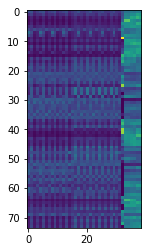

In [23]:
std_df_tp = np.delete(
    std_df
    ,  not_in_tp
    , axis=0
)

plt.imshow(std_df_tp)

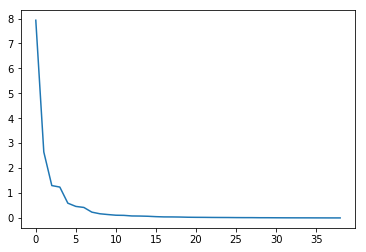

In [24]:
u,s,vT=np.linalg.svd(std_df_tp)
plt.plot(s)

#### Age gender data not joinable

In [25]:
nmf = NMF(5).fit(std_df_tp)
nmf_std_df = nmf.transform(std_df_tp)


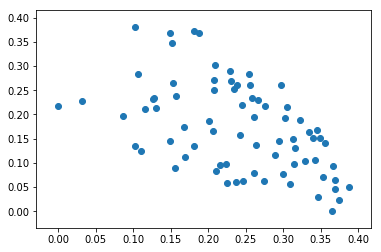

In [26]:
plt.scatter(x=nmf_std_df[:,0], y=nmf_std_df[:,1])


Features are:
* entry-Fall-Weekend-Night
* entry-Fall-Weekend-Day
* entry-Fall-Weekday-Night
* entry-Fall-Weekday-Day
* entry-Spring-Weekend-Night
* entry-Spring-Weekend-Day
* entry-Spring-Weekday-Night
* entry-Spring-Weekday-Day
* entry-Summer-Weekend-Night
* entry-Summer-Weekend-Day
* entry-Summer-Weekday-Night
* entry-Summer-Weekday-Day
* entry-Winter-Weekend-Night
* entry-Winter-Weekend-Day
* entry-Winter-Weekday-Night
* entry-Winter-Weekday-Day
* exit-Fall-Weekend-Night
* exit-Fall-Weekend-Day
* exit-Fall-Weekday-Night
* exit-Fall-Weekday-Day
* exit-Spring-Weekend-Night
* exit-Spring-Weekend-Day
* exit-Spring-Weekday-Night
* exit-Spring-Weekday-Day
* exit-Summer-Weekend-Night
* exit-Summer-Weekend-Day
* exit-Summer-Weekday-Night
* exit-Summer-Weekday-Day
* exit-Winter-Weekend-Night
* exit-Winter-Weekend-Day
* exit-Winter-Weekday-Night
* exit-Winter-Weekday-Day
* Real Estate Price (as published by Taiwanese Authority)
* Female Population, Age 0 - 19
* Memale Population, Age 0 - 19
* Female Population, Age 20 - 54
* Memale Population, Age 20 - 54
* Female Population, Age 54 <
* Memale Population, Age 54 <

<StemContainer object of 3 artists>

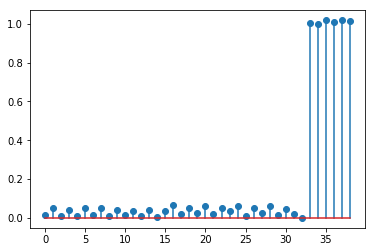

In [27]:
plt.stem(nmf.components_[0])

<StemContainer object of 3 artists>

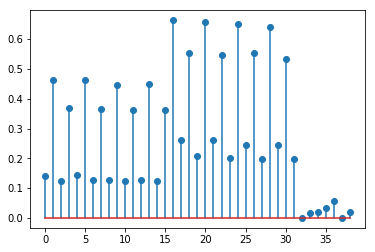

In [28]:
plt.stem(nmf.components_[1])

<StemContainer object of 3 artists>

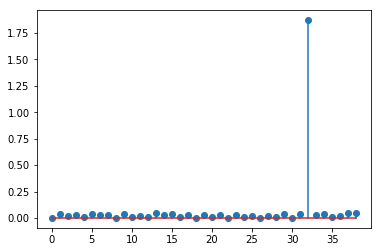

In [29]:
plt.stem(nmf.components_[2])

<StemContainer object of 3 artists>

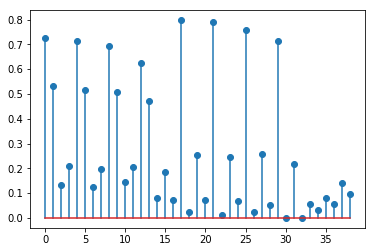

In [30]:
plt.stem(nmf.components_[3])

<StemContainer object of 3 artists>

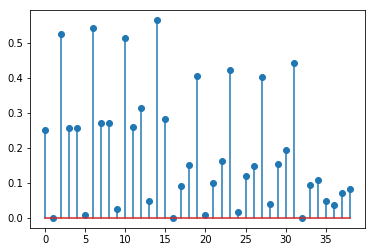

In [31]:
plt.stem(nmf.components_[4])

### Gaussian Mixture

In [32]:
from sklearn.metrics import silhouette_score

##### determining the optimal cluster with 2017/2018 data.

For n_clusters =2, the average silhouette_score is :0.3133960061856395
For n_clusters =3, the average silhouette_score is :0.3060325468236282
For n_clusters =4, the average silhouette_score is :0.2985656417561358
For n_clusters =5, the average silhouette_score is :0.30239487965389245
For n_clusters =6, the average silhouette_score is :0.28045841379124214
For n_clusters =7, the average silhouette_score is :0.28953285695859626
For n_clusters =8, the average silhouette_score is :0.2791392092264888
For n_clusters =9, the average silhouette_score is :0.27853776532477026
For n_clusters =10, the average silhouette_score is :0.2849022601346939
For n_clusters =11, the average silhouette_score is :0.2706496629496611
For n_clusters =12, the average silhouette_score is :0.2984688537610234
For n_clusters =13, the average silhouette_score is :0.2947473313704512
For n_clusters =14, the average silhouette_score is :0.2974951076406335
For n_clusters =15, the average silhouette_score is :0.2905860258111

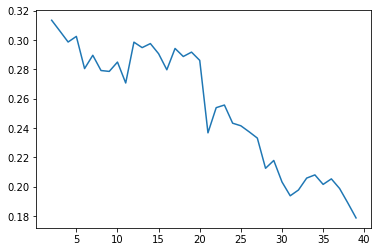

In [34]:
range_n_clusters = range(2, 40)

# dta = np.delete(nmf_std_df, not_in_tp, axis=0) #list(zip(np.sign(nmf_std_[:,0]) * np.log(np.abs(nmf_std_[:,0])), nmf_std_[:,1]))
sil_score = []

for n_clusters in range_n_clusters: #try different numbers of clusters
    gm = GaussianMixture(n_components=n_clusters, random_state=324)
    cluster_labels = gm.fit_predict(nmf_std_df)
    silhouette_avg = silhouette_score(nmf_std_df, cluster_labels)
    sil_score.append(silhouette_avg)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

plt.plot(range_n_clusters, sil_score)

In [35]:
n_components = 12
gm = GaussianMixture(n_components=n_components, random_state=2017)
cluster_labels = gm.fit_predict(nmf_std_df)

In [36]:
cluster_labels.size

74

In [38]:
x = {
    "C-0":['西湖', '港墘'],
    "C-1":['忠孝敦化', '台電大樓', '新埔', '中正紀念堂', '南港展覽館', '內湖', '南京復興'],
    "C-2":['奇岩', '唭哩岸', '昆陽'],
    "C-3":['雙連', '台大醫院', '動物園', '景美', '江子翠', '葫洲', '七張', '新店區公所'],
    "C-4":['木柵', '萬芳社區', '大安', '中山國中', '南港', '大坪林', '景安', '善導寺', '小南門'],
    "C-5":['永春', '台北車站', '西門', '大直'],
    "C-6":['石牌', '民權西路', '科技大樓', '頂溪', '龍山寺', '板橋'],
    "C-7":['北投', '辛亥', '麟光', '六張犁', '公館'],
    "C-8":['明德', '圓山', '大湖公園', '海山', '新店'],
    "C-9":['淡水', '市政府', '國父紀念館', '忠孝新生', '文德'],
    "C-10":['紅樹林', '竹圍', '關渡', '忠義', '新北投', '芝山', '劍潭', '士林', '府中', '亞東醫院', '土城', '永寧', '東湖', '南港軟體園區', '萬隆', '復興崗'],
    "C-11":['萬芳醫院', '後山埤', '忠孝復興', '古亭'],
}


cluster_dict={}
for k, v in x.items():
    for e in v:
        cluster_dict[e] = k

In [116]:
shp_tp = shp.drop(index=not_in_tp[0])
shp_tp

,AREA,PERIMETER,NAME,LOC,geometry
5,0.0,0.0,新北投站,原台鐵新北投站附近,POINT (300669.5467898832 2781039.418315906)
6,0.0,0.0,北投站,原台鐵北投站址,POINT (300274.3333243399 2780480.860050815)
7,0.0,0.0,奇岩站,原台鐵淡水線與三合街交叉口,POINT (300528.1956512491 2779781.504059019)
8,0.0,0.0,唭哩岸站,原台鐵淡水線與東華街２段３００巷交叉口,POINT (301052.6936881035 2779259.871577697)
11,0.0,0.0,芝山站,原台鐵淡水線與福國路交叉口,POINT (302701.910783924 2777267.135157997)
13,0.0,0.0,劍潭站,原台鐵淡水線與９６號計劃道路交叉口,POINT (302954.6750262937 2775210.645470202)
14,0.0,0.0,士林站,原台鐵士林站址,POINT (303073.9985767729 2776234.334185035)
15,0.0,0.0,民權西路站,原台鐵淡水線與民權西路交叉口,POINT (302398.224943876 2772842.529425553)
16,0.0,0.0,雙連站,原台鐵淡水線與民生西路交叉口,POINT (302536.3809421242 2772263.769237945)
17,0.0,0.0,臺大醫院站,公園路與常德街口,POINT (302090.0533510828 2770509.742251826)


In [117]:
clusters = sorted(list(zip(shp_tp.NAME.tolist(), cluster_labels)), key=lambda x: x[1])
for i in range(n_components): 
    print('C-%d' % i)
    print([n for n, idx in clusters if idx == i])



C-0
['徐匯中學站', '三民高中站']
C-1
['永寧站', '景安站', '南京復興站', '復興崗站', '台北橋站', '新莊站', '丹鳳站']
C-2
['民權西路站', '雙連站', '龍山寺站']
C-3
['科技大樓站', '大安站', '中山國中站', '善導寺站', '忠孝新生站', '松山機場站', '松山站', '中山站']
C-4
['南港站', '昆陽站', '台電大樓站', '景美站', '江子翠站', '東湖站', '南港軟體園區站', '萬隆站', '公館站']
C-5
['府中站', '新店站', '永安市場站', '三和國中站']
C-6
['臺大醫院站', '六張犁站', '忠孝復興站', '中正紀念堂', '台北車站', '西門站']
C-7
['士林站', '市政府站', '國父紀念館', '忠孝敦化站', '信義安和站']
C-8
['動物園站', '萬芳社區站', '小碧潭站', '迴龍站', '頂埔站']
C-9
['新北投站', '亞東醫院站', '土城站', '新店區公所', '先嗇宮站']
C-10
['北投站', '奇岩站', '唭哩岸站', '芝山站', '劍潭站', '木柵站', '萬芳醫院站', '辛亥站', '南港展覽館站', '大直站', '西湖站', '港墘站', '大橋頭站', '劍南路站', '台北101/世貿站', '松江南京站']
C-11
['永春站', '板橋站', '大坪林站', '七張站']


#### Map

In [118]:
re_tp = re.drop(index=not_in_tp[0])

Text(0.5, 1.0, 'Gaussian Mixture Clustering on NMF features')

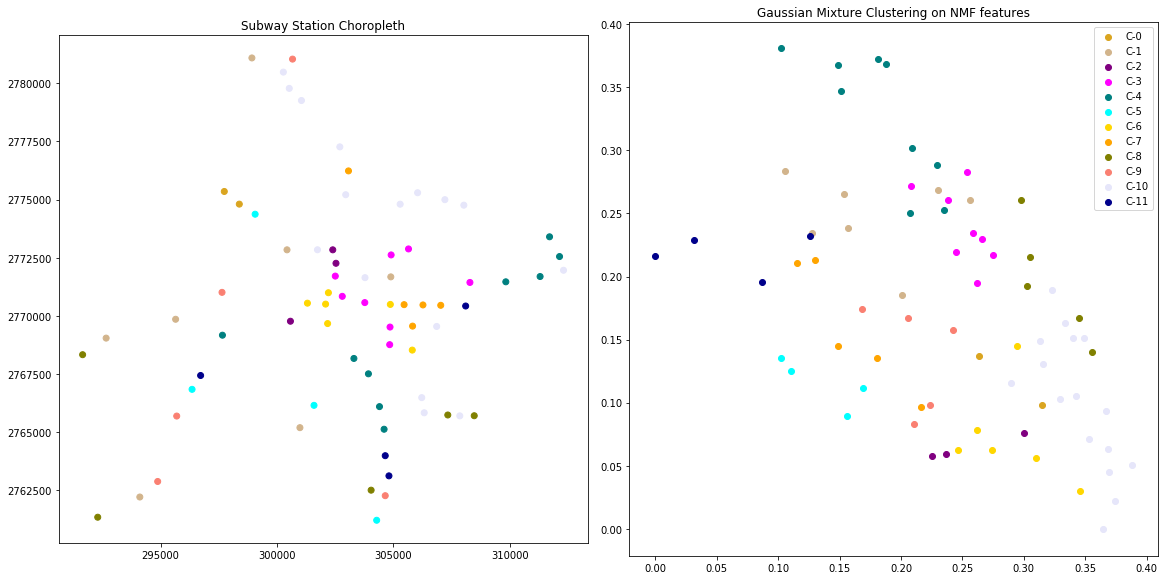

In [120]:
cs = ['goldenrod', 'tan', 'purple', 'magenta', 'teal', 'aqua', 'gold', 'orange', 'olive', 'salmon', 'lavender', 'darkblue', 'green', 'red', 'yellowgreen', 'tomato', 'orangered', 'silver', 'sienna', 'grey', 'turquoise', 'chocolate', 'maroon', 'darkgreen', 'black', 'navy', 'lightblue', 'violet', 'plum', 'azure', 'pink', 'orchid', 'yellow', 'coral', 'lightgreen', 'crimson', 'indigo', 'aquamarine', 'chartreuse', 'beige', 'khaki', 'brown', 'ivory', 'lime', 'white', 'wheat', 'blue']


fig, axs = plt.subplots(1, 2, figsize=(16, 8))
plt.tight_layout()
shp_tp.plot(c=[cs[c] for c in cluster_labels], ax=axs[0])
axs[0].set_title('Subway Station Choropleth')
for i in range(n_components):
    axs[1].scatter(
        x=nmf_std_df[np.where(cluster_labels==i),0]
        , y=nmf_std_df[np.where(cluster_labels==i),1]
        , label='C-%d' % i
        , color=cs[i]
    )
    
    
axs[1].legend()
axs[1].set_title('Gaussian Mixture Clustering on NMF features')